In [80]:
#載入套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [50]:
#匯入資料（但所有變數名稱皆是隱藏，但需要預測最後TARGET CLASS是哪個）
#index_col=0代表設定第一行為index
df = pd.read_csv('data/Classified Data',index_col=0)
X = df[['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']]
y = df[['TARGET CLASS']]

In [47]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
#載入標準化比例尺(StandardScaler)套件，只將所有`特徵值`做標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(X)
X = pd.DataFrame(data)

In [44]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [61]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

#從k=1開始測試
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [62]:
#測試KNN演算法的好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[87 11]
 [ 6 96]]


In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        98
           1       0.90      0.94      0.92       102

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



In [73]:
#剛剛只先用了k=1來建立模型，現在利用for來建立迴圈(選擇不同k值)，並紀錄錯誤率
from sklearn.metrics import accuracy_score
error_rate = []

for i in range(1,61,1):
    
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error =round(1 - accuracy_score(y_test, pred),3)    
    error_rate.append(error)

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A col

In [78]:
print(error_rate)

[0.085, 0.105, 0.065, 0.06, 0.07, 0.07, 0.07, 0.055, 0.055, 0.05, 0.04, 0.05, 0.045, 0.045, 0.05, 0.05, 0.045, 0.045, 0.045, 0.045, 0.055, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.035, 0.045, 0.05, 0.045, 0.045, 0.045, 0.05, 0.05, 0.05, 0.055, 0.05, 0.06, 0.055, 0.055, 0.055, 0.055, 0.055, 0.06, 0.055, 0.065, 0.055, 0.065, 0.06, 0.06, 0.055, 0.065, 0.06, 0.065, 0.06, 0.065, 0.065, 0.075, 0.065]


Text(0, 0.5, 'Error Rate')

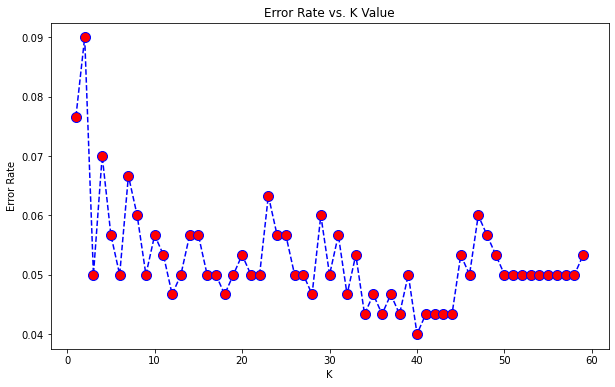

In [20]:
#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

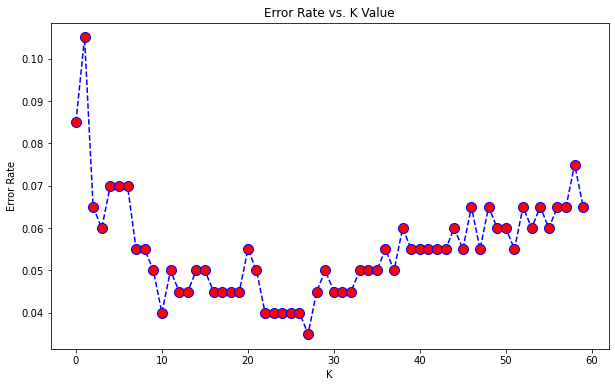

In [83]:
#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
#跟一開始k=1做比較
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=1


[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [23]:
#選擇錯誤率最低的K=?????來看precision、recall、f1-score、support表現


In [89]:
temp = min(error_rate)
k = error_rate.index(temp) + 1

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k= {}'.format(k))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

28
WITH k= 28


[[ 91   7]
 [  0 102]]


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        98
           1       0.94      1.00      0.97       102

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
